# Student Performance Analysis

This project analyses the academic performance of students based on factors such as gender, race/ethnicity, parental level of education, lunch type, and test preparation course. The goal of this analysis is to understand:
- What factors influence student performance the most
- Whether social and educational background affects academic results
- How test preparation and support systems can improve outcomes

The dataset contains students' scores in:
- Math
- Reading
- Writing

Along with demographic and academic background information.


In [34]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

# Make a clean copy
data = df.copy()

# Rename columns for easier use
data.columns = [col.strip().lower().replace("/", "_").replace(" ", "_") for col in data.columns]

# Check basic structure
print("Shape of dataset:", data.shape)
data.head()


Shape of dataset: (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
# Check missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check duplicates
print("\nDuplicate rows:", data.duplicated().sum())

# Check data types
print("\nData types:")
print(data.dtypes)


Missing values:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Duplicate rows: 0

Data types:
gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


Data Quality Summary:
- The dataset contains 1000 records and 8 columns
- There are no missing values in any column
- No duplicate rows were found
- Score columns are numeric and suitable for analysis
- Categorical columns are cleanly formatted

The dataset is considered clean and ready for analysis.

In [36]:
# Create total score column
data["total_score"] = data["math_score"] + data["reading_score"] + data["writing_score"]

# View first 5 rows
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


Math, Reading, and Writing scores were added together to make a new feature called total_score. This allows us to easily analyse the overall acadamic performance more effectively. 

## Univariate Analysis
Univariate analysis focuses on analyzing one variable at a time. 
In this part of the project, we explore the distribution of student performance and demographic variables such as gender and lunch type. Doing this helps us understand the basic structure and patterns within the data before studying relationships between variables.

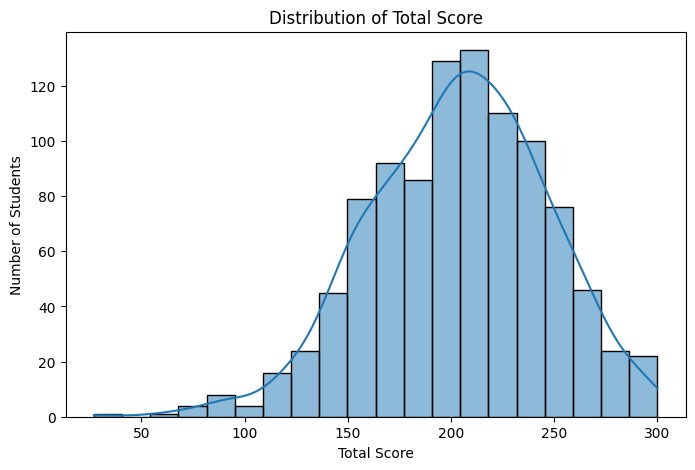

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data["total_score"], bins=20, kde=True)
plt.title("Distribution of Total Score")
plt.xlabel("Total Score")
plt.ylabel("Number of Students")
plt.show()

The entire score distribution appears to be roughly bell-shaped with a slight left skew.  This suggests that the majority of students scored within the average range, making a central peak in the graph, while a smaller group of students achieved extremely low total scores, resulting in a longer tail on the left side.  This pattern indicates that the majority of students perform at a moderate to good level in all three areas (math, reading, and writing), with fewer students struggling considerably.  The data's slightly left-skewed nature shows that low-performing students are less common, which bodes well for the dataset's overall academic performance.

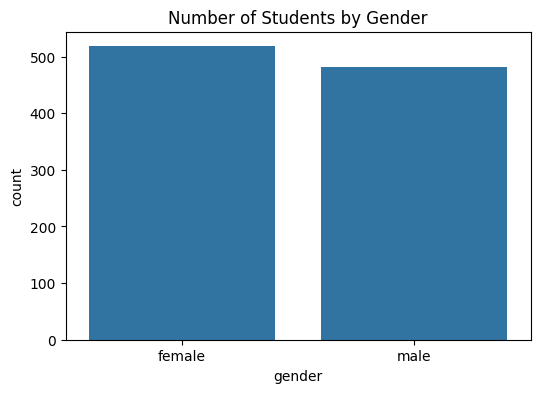

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="gender")
plt.title("Number of Students by Gender")
plt.show()

The chart shows that there are slightly more female students than male students in the dataset.  The female count is just around 500, while the male count is slightly lower at around 480. Although the difference is not extremely large, it shows a small female majority in the sample population . This is important to note because it may have a small impact on overall average scores and performance trends when comparing results across genders in future analyses.

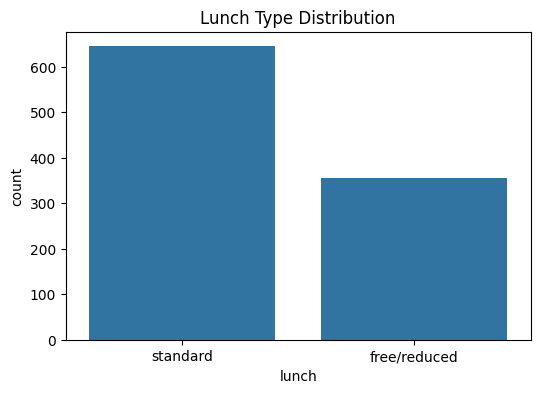

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="lunch")
plt.title("Lunch Type Distribution")
plt.show()

More than 600 students fall under "standard" lunches, while around 350 students receive "free/reduced" lunches.  This suggests that a larger portion of students come from households that do not qualify for subsidised lunch programs, implying that the majority of the sample has relatively better economic conditions.  However, the considerable amount of students in the free/reduced group suggests that a significant proportion may still be from low-income families.  As a result, lunch type becomes a significant variable for analysing its relationship with academic performance later in the study.

# Bivariate Analysis 

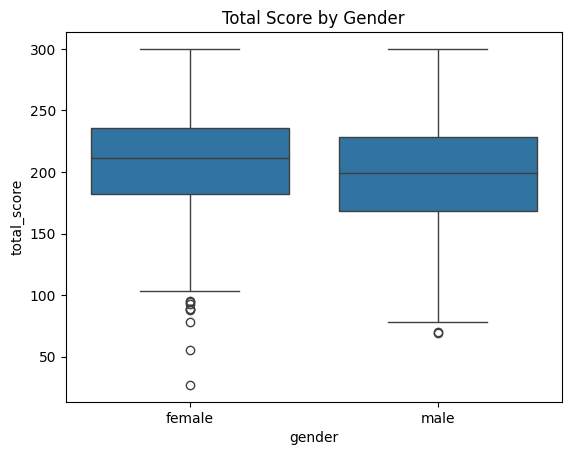

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = df.columns.str.replace(" ", "_")
df.columns
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]

plt.figure()
sns.boxplot(data=df, x="gender", y="total_score")
plt.title("Total Score by Gender")
plt.show()

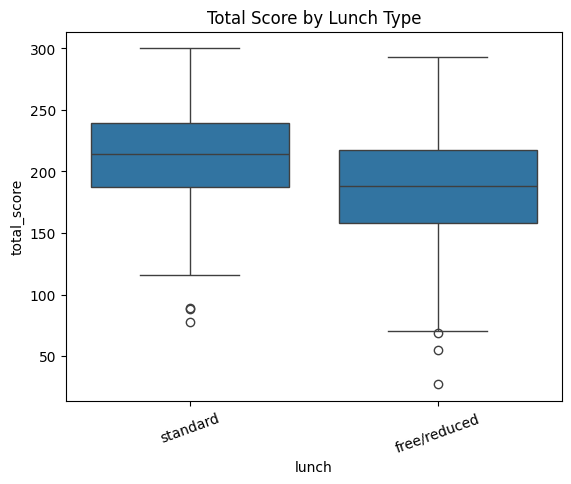

In [41]:
plt.figure()
sns.boxplot(data=df, x="lunch", y="total_score")
plt.title("Total Score by Lunch Type")
plt.xticks(rotation=20)
plt.show()

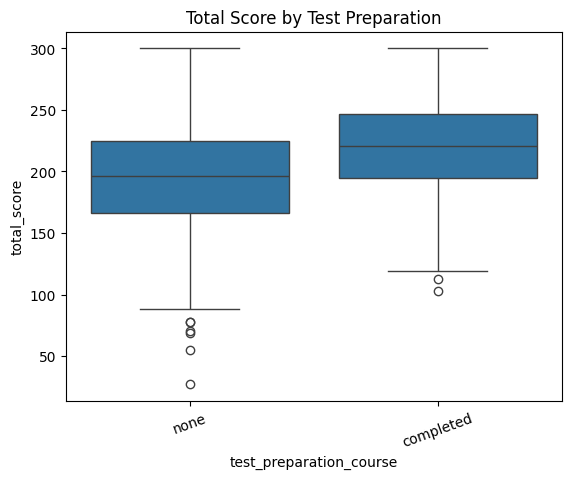

In [42]:
plt.figure()
sns.boxplot(data=df, x="test_preparation_course", y="total_score")
plt.title("Total Score by Test Preparation")
plt.xticks(rotation=20)
plt.show()

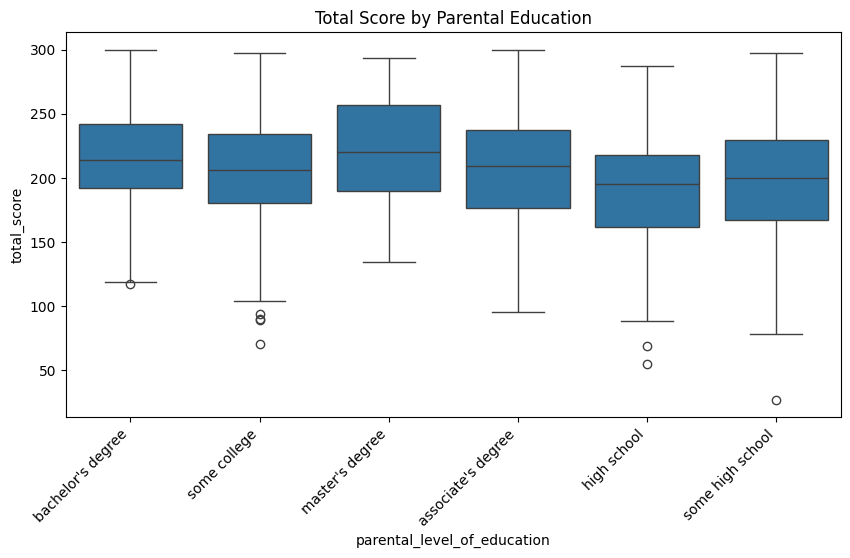

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="parental_level_of_education", y="total_score")
plt.xticks(rotation=45, ha="right")
plt.title("Total Score by Parental Education")
plt.show()

Bivariate Analysis: Total Score vs Key Factors
The relationship between overall academic performance and other student background factors reveals many significant patterns.  When comparing gender and total score, female students typically perform more favourably overall.  The female distribution extends to higher values, implying greater maximum outcomes, whereas male scores look more concentrated in the medium range.  Interestingly, the female group likewise has more outliers, suggesting a broader diversity in performance among females, although male scores are slightly more consistent, with fewer extremes.
Students who receive standard lunch tend to achieve higher total scores than those who take part in free or reduced lunch programs.  This difference, albeit not particularly big, implies a possible relationship between socioeconomic support and academic performance.  The standard lunch category also shows slightly tighter clustering at higher values, whereas the free/reduced group has more low-end outliers, indicating an increased vulnerability to poor academic outcomes.
A similar trend appears when analysing test preparation courses.  Students who completed the test preparation course performed significantly better overall than those who did not.  This demonstrates the positive impact of structured academic support prior to tests. The “none” category not only has a lower central score, but also contains a higher number of outliers, meaning students without preparation are more likely to perform poorly or inconsistently.
Finally, when it comes to parental education level, students whose parents have a master's or bachelor's degree likely to perform better overall than those whose parents only completed high school or some high school education.  Higher parental education appears to be linked to improved student performance, presumably as a result of higher academic support, guidance, and access to educational materials at home.  Meanwhile, students with less-educated parental backgrounds have lower medians and more low-performing outliers, supporting the notion that family educational background has a major impact on student accomplishment.
Overall, these bivariate connections show that students' socioeconomic background, academic support, and home environment have a significant impact on their academic success, as reflected by their total scores.


# Multivariate Analysis 
multivariate analysis is used to explore how gender, lunch type, test preparation course, and parental education level collectively influence students’ academic performance (math, reading, writing, and total score). This helps identify combined effects rather than isolated ones.

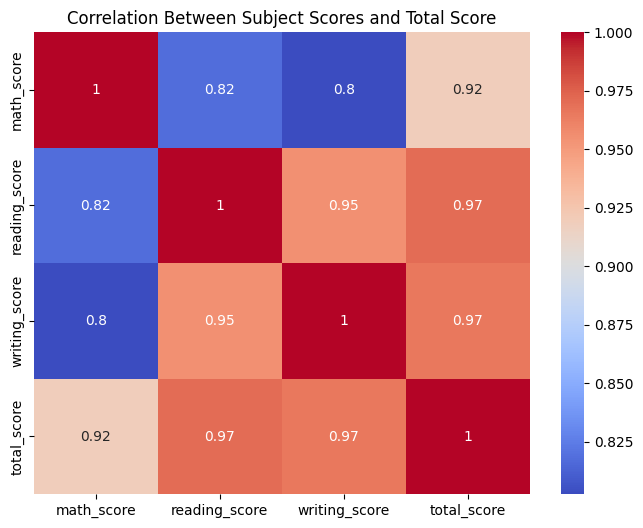

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between subject scores + total score
corr = df[["math_score", "reading_score", "writing_score", "total_score"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Subject Scores and Total Score")
plt.show()


In [45]:
grouped = df.groupby(
    ["gender", "lunch", "test_preparation_course", "parental_level_of_education"]
)["total_score"].mean().reset_index()

grouped.sort_values(by="total_score", ascending=False).head(10)


,gender,lunch,test_preparation_course,parental_level_of_education,total_score
39,male,standard,completed,master's degree,261.000000
15,female,standard,completed,master's degree,246.000000
16,female,standard,completed,some college,239.615385
13,female,standard,completed,bachelor's degree,239.357143
45,male,standard,none,master's degree,234.000000
40,male,standard,completed,some college,233.560000
37,male,standard,completed,bachelor's degree,232.866667
12,female,standard,completed,associate's degree,232.766667
0,female,free/reduced,completed,associate's degree,228.333333
21,female,standard,none,master's degree,226.933333


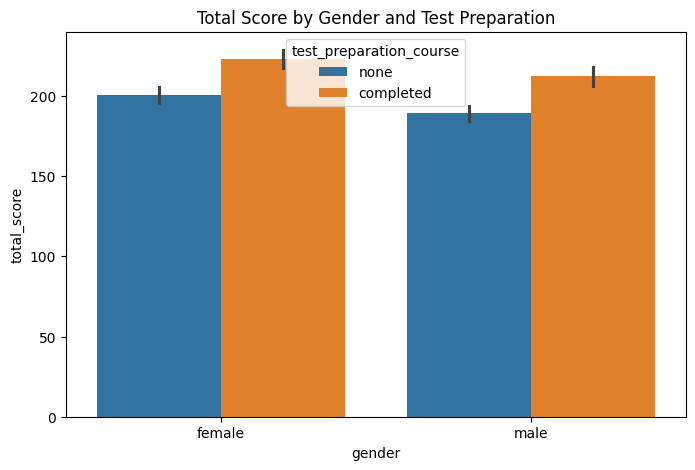

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="gender", y="total_score", hue="test_preparation_course")
plt.title("Total Score by Gender and Test Preparation")
plt.show()

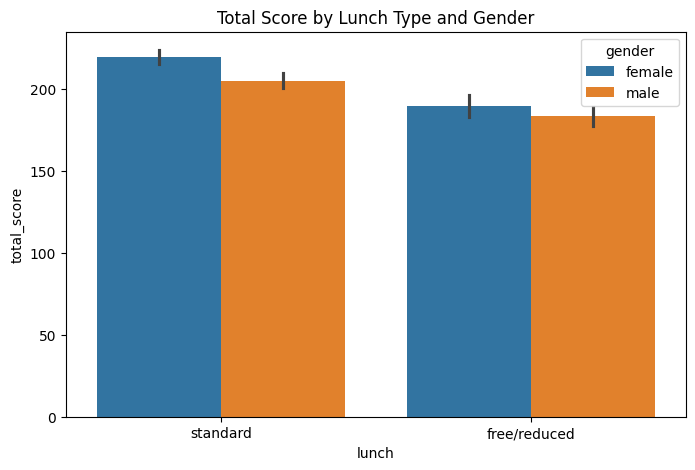

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="lunch", y="total_score", hue="gender")
plt.title("Total Score by Lunch Type and Gender")
plt.show()

The multivariate analysis shows that student performance is influenced by a variety of background and support factors.  Students that eat standard lunch, finish test preparation courses, and have parents with higher levels of education likely to have the highest overall results in all subjects.  Female students typically perform somewhat better overall when given supportive conditions like test preparation and good nutritious food.  Students who do not prepare for tests, have free or reduced meals, and have poorer parental education backgrounds likely to perform much lower.  This shows the significant combined impact of socio-economic background, academic support systems, and parental education on student accomplishment.

<Axes: >

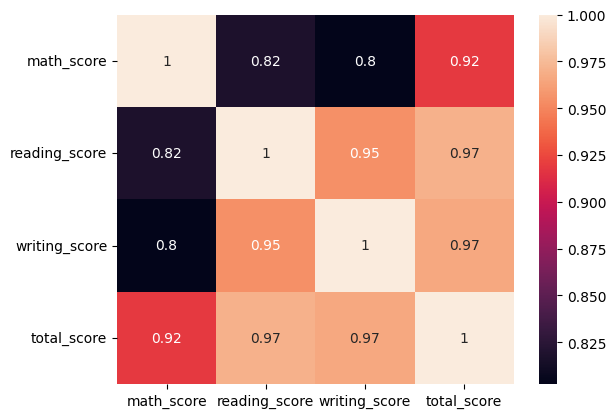

In [48]:
sns.heatmap(df[["math_score","reading_score","writing_score","total_score"]].corr(), annot=True)

The correlation heatmap shows highly significant positive correlations between all academic subjects and the total score.  Reading and writing scores show the highest correlation (0.95), indicating students who excel in reading also excel in writing.
The total score has an almost perfect correlation with reading and writing (0.97), as well as a very strong correlation with maths (0.92).  This is to be expected given that the total score is a combination of the three subjects.
These strong correlations show that overall academic performance is very consistent across subjects.  Rather than excelling in one area, most students perform similarly in all subjects. This means that any programs or measures meant to help students do better in school should be made with the whole student in mind, not just one subject.

In [49]:
grouped = df.groupby(
    ["gender", "lunch", "test_preparation_course"]
)["total_score"].mean().reset_index()

grouped.sort_values(by="total_score", ascending=False)

,gender,lunch,test_preparation_course,total_score
2,female,standard,completed,232.438596
6,male,standard,completed,220.539823
3,female,standard,none,212.883721
0,female,free/reduced,completed,208.585714
4,male,free/reduced,completed,197.163934
7,male,standard,none,196.458128
1,female,free/reduced,none,178.504202
5,male,free/reduced,none,174.971429


When multiple factors are analysed simultaneously, highly obvious performance patterns emerge.  Female students who have standard lunch and have finished the exam preparation course achieve the highest average total score (232.4).  This group outperforms all others, implying that access to standard nutrition and academic preparation has a major impact on performance, particularly among female students.
Male students who received standard lunch and finished the test preparation course ranked second (220.5), supporting the notion that test preparation combined with good nutrition provides a significant advantage regardless of gender.  However, under the same settings, female students slightly outperform male students in all conditions.
Male students receiving free or reduced lunch who did not complete the test preparation course scored the lowest, with an average total score of 174.9.  This suggests that a lack of academic preparation, along with socioeconomic disadvantage, might have a major impact on academic performance.
Overall, the analysis clearly demonstrates that testing preparation is the most powerful predictor of improved performance, followed by lunch type (a proxy for socioeconomic status) and gender.  These findings highlight the need of ensuring equal access to educational resources, support systems, and adequate nutrition in order to close performance gaps and increase student accomplishment.

# Final Conclusion 
The Education performance Analysis project investigated how many factors such as gender, parental education level, lunch type, and test preparation affect student academic performance in mathematics, reading and writing.
Univariate, bivariate, and multivariate analyses revealed that student scores do not occur in isolation.  Instead, they are influenced by a combination of academic preparation and socioeconomic factors.  Students who took the exam preparation course consistently performed better than those who did not.  Similarly, students who received standard lunch (an indicative of higher socioeconomic support) outperformed those who received free or reduced lunch.
While gender differenes existed, they were less important than preparation level and access to resources.  Female students fared slightly better than male students in identical conditions although exam preparation and lunch type remained the most influential factors.
Overall, this analysis demonstrates that asuccess is not solely dependent on student ability, but also on access, opportunity, and support systems.  Providing equitable resources to all students is critical for developing fair and effective education systems.

# Recommendations
Based on what this analysis found, the following measures are strongly recommended: 
1. Improve access to test preparation programs.
Schools and organisations should provide free or low-cost exam preparation support, particularly for children from low-income families.  This might considerably close the performance difference.

2. Improve student nutrition programs.
Since students who ate standard lunch performed better, enhancing food quality and access through school meal programs can directly improve learning results.

3. Provide additional support to at-risk groups
Students from low-income homes or with limited parental education may benefit from tutoring, mentoring, and after-school academic programs and learning opportunities.

4. Encourage equitable learning opportunities.
Educational institutions should help to reduce institutional and economic inequalities by providing resources such free learning materials, study groups, and counselling.

5. Use data for early intervention.
Schools can utilise data analytics to identify struggling students early on and provide timely assistance before academic gaps get worse.

# Dashboard 